In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Titanic Data Set: <br/>
https://www.kaggle.com/c/titanic/data

In [2]:
train = pd.read_csv('./data/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('./data/test.csv')

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
print(train.count())
train.isnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

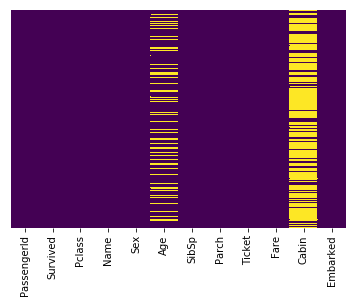

In [8]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis',yticklabels=False)

Survived
0    549
1    342
Name: PassengerId, dtype: int64


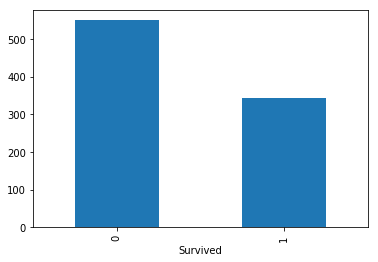

In [9]:
print(train.groupby('Survived').PassengerId.count())
train.groupby('Survived').PassengerId.count().plot.bar()

Survived
0    0.616162
1    0.383838
Name: PassengerId, dtype: float64


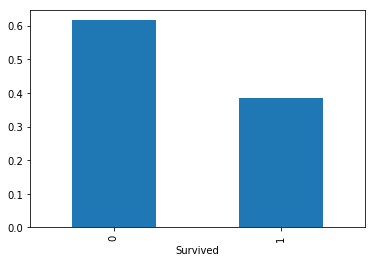

In [10]:
print(train.groupby('Survived').PassengerId.count().groupby(level=0).apply(lambda x:x/float(train.PassengerId.count())))
train.groupby('Survived').PassengerId.count().groupby(level=0).apply(lambda x:x/float(train.PassengerId.count())).plot(kind='bar')

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


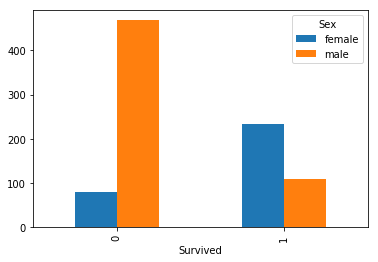

In [11]:
print(train.groupby(['Survived','Sex']).PassengerId.count())
train.groupby(['Survived','Sex']).PassengerId.count().unstack().plot.bar()

Survived  Sex   
0         female    0.147541
          male      0.852459
1         female    0.681287
          male      0.318713
Name: PassengerId, dtype: float64


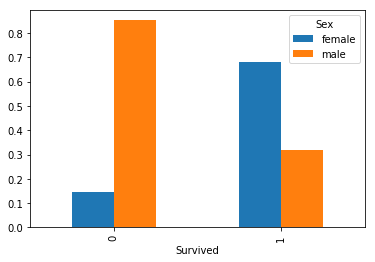

In [38]:
print(train.groupby(['Survived','Sex']).PassengerId.count().groupby(level=0).apply(lambda x:x/float(x.sum())))
train.groupby(['Survived','Sex']).PassengerId.count().groupby(level=0).apply(lambda x:x/float(x.sum())).unstack().plot(kind='bar')

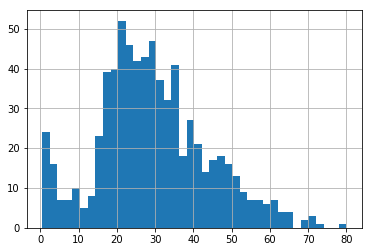

In [12]:
train['Age'].hist(bins=40)

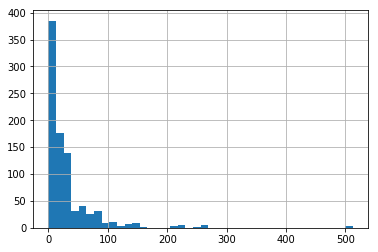

In [13]:
train['Fare'].hist(bins=40)

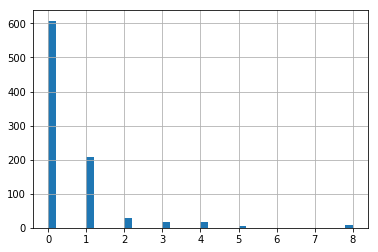

In [14]:
train['SibSp'].hist(bins=40)

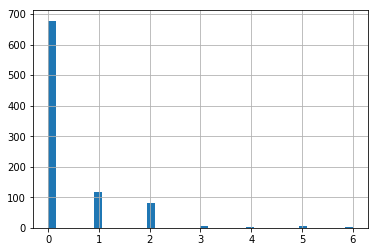

In [15]:
train['Parch'].hist(bins=40)

Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: PassengerId, dtype: int64


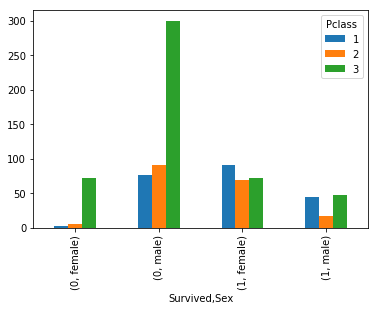

In [16]:
print(train.groupby(['Survived','Sex','Pclass']).PassengerId.count())
train.groupby(['Survived','Sex','Pclass']).PassengerId.count().unstack().plot.bar()

In [17]:
print(train.groupby(['Sex','Pclass']).Age.mean())
train[(train['Sex']=='male') & (train['Pclass']==1)].Age.mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64


41.28138613861386

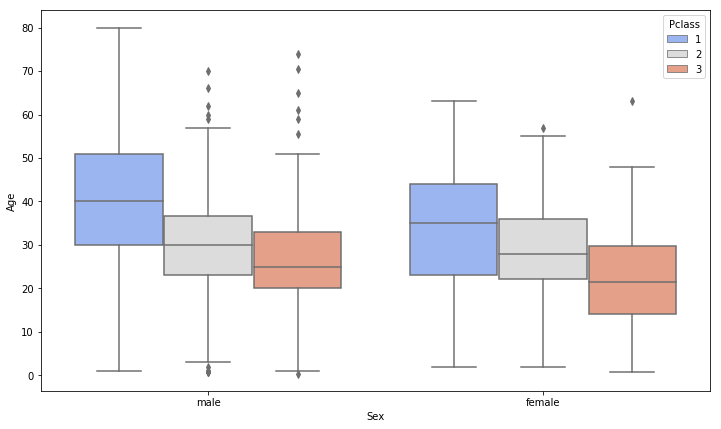

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sex',y='Age',hue='Pclass',data=train,palette='coolwarm')

In [19]:
def fill_age(cols):
    sex = cols[0]
    pclass = cols[1]
    age = cols[2]
    
    if pd.isnull(age):
        return train[(train['Sex']==sex) & (train['Pclass']==pclass)].Age.mean()
    else:
        return age
    
train['Age_calc']=train[['Sex','Pclass','Age']].apply(fill_age,axis=1)
            
        

In [20]:
train[train['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_calc
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,26.507589
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,30.740707
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,21.750000
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,26.507589
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,21.750000


In [21]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Age_calc       891
dtype: int64

In [23]:
train['Age']=train['Age_calc']

In [24]:
train.drop(['Age_calc','Cabin'],axis=1,inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
#let's also drop rows that have NaN values still since there are only a couple in Embarked
train.dropna(inplace=True)

In [27]:
train.count()

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
dtype: int64

In [28]:
#To prep for machine learning we need to convert categorical variables into numeric
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [32]:
#don't want both since they are perfect predictors of each other and would mess up machine learning algorithm
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [36]:
#again need to drop one so they are not perfect predictors of each other
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [37]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [38]:
train = pd.concat([train,sex,embarked],axis=1)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [40]:
#for machine learning don't need columns that can't predict with:  PassengerId, Name, Ticket.  
#also no longer need Sex and Embarked
#could try to feature engineer these other columsn but not for simple models we're going to use

train.drop(['PassengerId','Name','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [41]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [67]:
#could also convert Pclass from categorical to indicator 
#but first let's explore how model handles it since it is numeric
